In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import openpyxl
import re
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd


ModuleNotFoundError: No module named 'openpyxl'

In [2]:
#reading datasets
water_potability = pd.read_csv(r'water_potability.csv')

In [3]:
water_potability.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
water_potability.shape

(3276, 10)

In [5]:
water_potability.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


***data cleaning***


In [6]:
#checking for missing values
water_potability.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
#replacing missing values with mean
water_potability.fillna(water_potability.mean(), inplace=True)

In [8]:
water_potability.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
#checking for duplicates
water_potability.duplicated().sum()

0

***Data Visualization***

<AxesSubplot: xlabel='Potability', ylabel='count'>

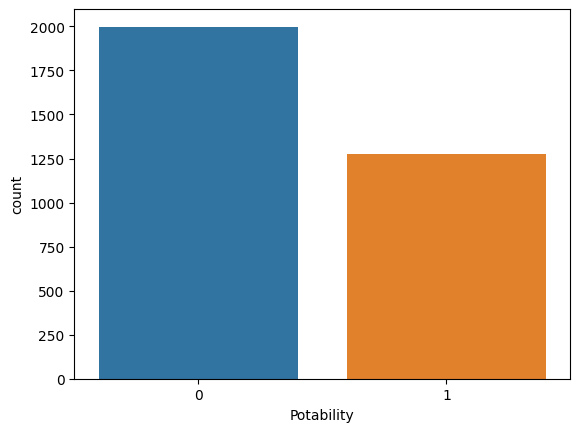

In [10]:
# plot the distribution of the target variable
import seaborn as sns
sns.countplot(x='Potability', data=water_potability)


<AxesSubplot: >

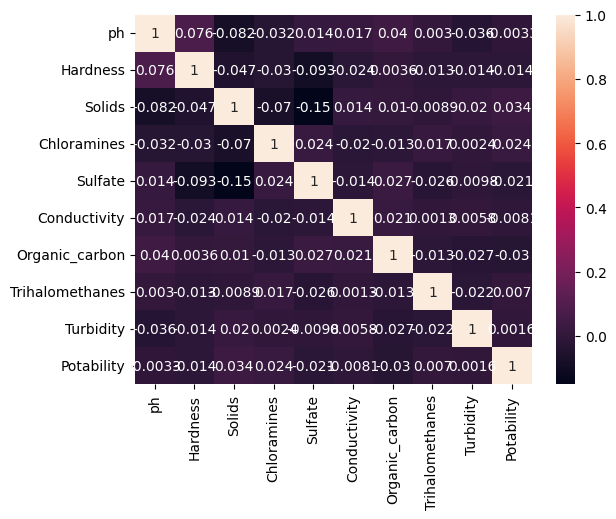

In [11]:
#Showing correlation
corr = water_potability.corr()
sns.heatmap(corr, annot=True)

***model***

In [12]:
# Defining the features and target
X = water_potability[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
y = water_potability['Potability']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a random forest classifier and fit it to the training data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Calculate the mean absolute and mean squared error
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))




Accuracy: 0.6783536585365854
Mean Absolute Error: 0.32164634146341464
Mean Squared Error: 0.32164634146341464


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the parameter grid for the grid search
param_grid = {'max_depth': [3, 4, 5, 6, 7],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters: ", grid_search.best_params_)

# Make predictions on the testing set using the best model
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Calculate the mean absolute and mean squared error
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))



Best hyperparameters:  {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.6432926829268293
Mean Absolute Error: 0.3567073170731707
Mean Squared Error: 0.3567073170731707


In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an SVM classifier and fit it to the training data
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Calculate the mean absolute and mean squared error
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))




Accuracy: 0.6265243902439024
Mean Absolute Error: 0.37347560975609756
Mean Squared Error: 0.37347560975609756


In [16]:
# train a nearest neighbors model using scikit-learn
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Calculate the mean absolute and mean squared error
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))





Accuracy: 0.6265243902439024
Mean Absolute Error: 0.37347560975609756
Mean Squared Error: 0.37347560975609756


In [17]:
# profiling data with pandas
from pandas_profiling import ProfileReport
profile = ProfileReport(water_potability)
profile.to_notebook_iframe()
profile = ProfileReport(water_potability, title="Pandas Profiling Report")
profile.to_file("FinalReport.html")

In [18]:
#save the model to a pickle file
import pickle
pickle.dump(rf_classifier, open('model.pkl','wb'))
model=pickle.load(open('model.pkl', 'rb'))
print('The model has been trained and saved to a pickle file')


The model has been trained and saved to a pickle file
